In [1]:
root_path = "/Users/danieldubovski/projects/deep_query_optimization"

import sys
import os
sys.path.insert(0, root_path)

In [2]:
# import tkinter
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib as mpl

plt_backend = mpl.get_backend()
print(plt_backend)
from matplotlib import pyplot as plt
import pandas as pd
from pandas import Panel
import numpy as np
import pytorch_lightning as pl
import torch
from importlib import reload 
from tqdm.auto import tqdm
from collections import Counter
import sklearn
import seaborn as sns
from sklearn import metrics as skm
import json
from dqo.estimator import evaluate as ge
from dqo.estimator.gerelt.v20 import evaluate as ge20
from dqo.estimator.gerelt import  v1, v2, v3, v4, v7, v8,v10,v11, v12, v13,v14, v20
from dqo import datasets

mpl.use(plt_backend)

module://ipykernel.pylab.backend_inline


/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  # Remove the CWD from sys.path while we load stuff.


In [3]:
import importlib

importlib.reload(datasets)
importlib.reload(ge)
importlib.reload(v1)
importlib.reload(v2)


<module 'dqo.estimator.gerelt.v2' from '/Users/danieldubovski/projects/deep_query_optimization/dqo/estimator/gerelt/v2/__init__.py'>

# TPCH

In [3]:
from collections import defaultdict
metas = [
    (v20,  os.path.join(os.getcwd(), 'v20/logs/tpch/version_3/checkpoints/epoch=26-step=473795.ckpt')),
]

r = defaultdict(dict)
for meta in metas:
    version, checkpoint = meta
    for ds_name in ['tpcd', 'tpch', 'tpcds']:
        ds = datasets.ExtendedQueriesDataset(f'{ds_name}:extended')

        estimater = ge20.QueryEstimater(
            checkpoint, 
            dataset=ds, 
            encoder=version.encoder, 
            model_cls=version.model.GereltRegressor
        )

        results = estimater.evaluate()
        r[str(version.__name__)][ds_name] = results
        print(f'df: {ds_name} v: {str(version.__name__)}, :: ', json.dumps(ge.evaluate_metrics(results)))

/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
  0%|          | 0/135 [00:00<?, ?it/s]

0


100%|██████████| 135/135 [00:27<00:00,  4.85it/s]
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


df: tpcd v: dqo.estimator.gerelt.v20, ::  {"accuracy": 0.17777777777777778, "balanced accuracy": 0.07539682539682536, "kappa": 0.10054021608643449, "recall": 0.12847222222222224, "f1 macro": 0.11190169817927172, "f1 weighted": 0.15359352629940864, "mae": 27.0470658371764, "mean_rounded_two_sided_error": [[0.0, 2.246358296497002], [0.0, 2.5365294916746306], [-0.44410113827726505, 2.310461492750134], [-0.3322713094510471, 1.2038075521396034], [-0.7133832284633874, 3.101001997522667], [-1.647768618077984, 1.7502848760865521], [-1.6412520676770734, 0.7038801447923522], [-2.5604770736814793, 0.71919785171012], [-1.0446471266376098, 0.3982958001076476], [-2.324374486327251, 0.0], [-3.550800270543307, 0.054958364141675986], [-3.8122354756374293, 0.7256587169431921], [-3.4404160396494063, 0.0], [-6.46768088135411, 0.0], [-8.440002865122613, 0.0]], "bucket_errors": [[0, 1, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [2, 2, 1, 1, 2, 0, 0, 0, 0], [5, 0, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0

  0%|          | 0/652 [00:00<?, ?it/s]

0


 15%|█▌        | 100/652 [00:26<02:27,  3.75it/s]

100


 30%|██▉       | 193/652 [00:50<02:10,  3.51it/s]

200


 41%|████      | 267/652 [01:05<01:28,  4.34it/s]

300


 64%|██████▎   | 415/652 [01:26<00:23, 10.11it/s]

700


100%|██████████| 652/652 [01:55<00:00,  5.62it/s]


df: tpch v: dqo.estimator.gerelt.v20, ::  {"accuracy": 0.6426380368098159, "balanced accuracy": 0.5493922743922743, "kappa": 0.6095557525990465, "recall": 0.54321824009324, "f1 macro": 0.5456572459260508, "f1 weighted": 0.6400119492522194, "mae": 3.4274274402640086, "mean_rounded_two_sided_error": [[0.0, 1.1826408718593364], [-0.30891913709043806, 0.4684034782481401], [-0.4549687226784229, 1.1652308375296818], [-0.2239132395930832, 0.6024956097078981], [-0.18254331321792022, 0.23725402915860302], [-0.29560090092473706, 0.1806906452925298], [-0.7123668105588176, 0.8357084567685132], [-0.66357831062577, 0.35508957037394656], [-1.0026433302361677, 0.3149666305384485], [-0.8454250100540853, 0.15729509610741382], [-0.5468229430362929, 0.10169020245683179], [-0.5433444996951733, 0.2537652272002208], [-0.3017605897035654, 0.33113768379343816], [-2.2191925167637496, 0.036686873196941625], [-0.17341213437711853, 0.04853547115547707]], "bucket_errors": [[1, 1, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 0, 

  0%|          | 0/320 [00:00<?, ?it/s]

0


 31%|███▏      | 100/320 [00:44<01:42,  2.14it/s]

100


 49%|████▉     | 157/320 [01:08<01:27,  1.86it/s]

200


 57%|█████▋    | 183/320 [01:19<01:00,  2.28it/s]

9 NestedLoopOp() 'income_band'


 60%|█████▉    | 191/320 [01:23<01:22,  1.56it/s]

300


 68%|██████▊   | 216/320 [01:32<00:29,  3.52it/s]

500


 75%|███████▌  | 240/320 [01:42<00:37,  2.14it/s]

900


 88%|████████▊ | 281/320 [01:56<00:09,  3.94it/s]

13 NestedLoopOp() 'customer'
16 NestedLoopOp() 'promotion'


100%|██████████| 320/320 [02:05<00:00,  2.56it/s]


df: tpcds v: dqo.estimator.gerelt.v20, ::  {"accuracy": 0.0375, "balanced accuracy": -0.01199776785714286, "kappa": -0.038566912539515386, "recall": 0.047531512605042014, "f1 macro": 0.033213751835381625, "f1 weighted": 0.023061810175897885, "mae": 20.817718083463905, "mean_rounded_two_sided_error": [[0.0, 2.574831420650398], [0.0, 3.3451238298804693], [0.0, 2.995268311524435], [-0.8171128693662606, 1.1939152057356857], [-0.9890230263220047, 0.7138317354788444], [-1.5108609202727536, 1.5010518286174457], [-1.6262030554368485, 1.4342056862931827], [-2.2901991426088335, 2.5134643179734537], [-2.845250062711359, 1.519582642953902], [-3.5942195511578037, 0.0], [-4.731137892896504, 0.0], [-5.538238187667703, 0.0], [-6.835218567092364, 0.0], [-8.014733233150693, 0.0], [-11.815918091556714, 0.0], [-10.433764840148902, 0.0], [-7.932277873038425, 0.0]], "bucket_errors": [[0, 1, 0, 1, 0, 0, 0, 0, 0], [1, 0, 1, 1, 0, 1, 0, 0, 0], [1, 2, 0, 0, 0, 0, 0, 1, 0], [2, 3, 1, 0, 0, 0, 0, 0, 0], [2, 0, 0,

1

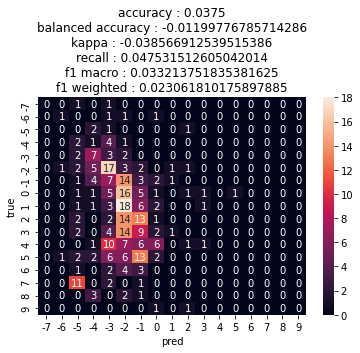

              precision    recall  f1-score   support

          -7       0.00      0.00      0.00         2
          -6       0.33      0.25      0.29         4
          -5       0.00      0.00      0.00         4
          -4       0.04      0.12      0.06         8
          -3       0.04      0.21      0.07        14
          -2       0.03      0.09      0.04        32
          -1       0.05      0.09      0.06        32
           0       0.06      0.03      0.04        32
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        32
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00        32
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        14
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         2

    accuracy              

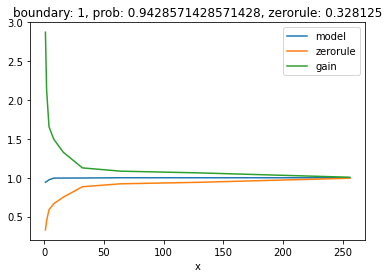

In [4]:
ge.display_results(results)

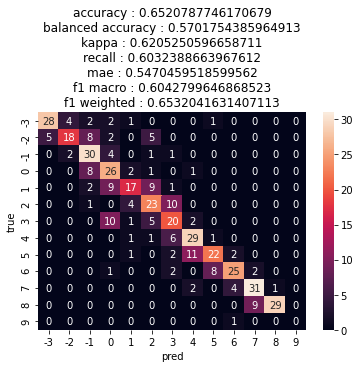

              precision    recall  f1-score   support

          -3       0.85      0.74      0.79        38
          -2       0.75      0.47      0.58        38
          -1       0.59      0.79      0.67        38
           0       0.48      0.68      0.57        38
           1       0.63      0.45      0.52        38
           2       0.51      0.61      0.55        38
           3       0.48      0.53      0.50        38
           4       0.64      0.76      0.70        38
           5       0.69      0.58      0.63        38
           6       0.78      0.66      0.71        38
           7       0.74      0.82      0.78        38
           8       0.97      0.76      0.85        38
           9       0.00      0.00      0.00         1

    accuracy                           0.65       457
   macro avg       0.62      0.60      0.60       457
weighted avg       0.67      0.65      0.65       457

2
           abs_err             err_ratio          
              mean      me

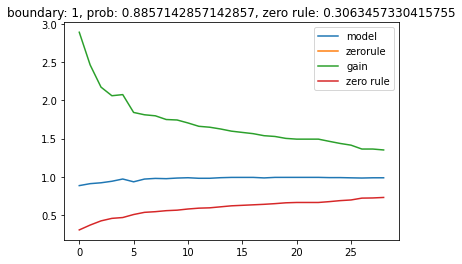

In [13]:
ge.display_results(v3_results)

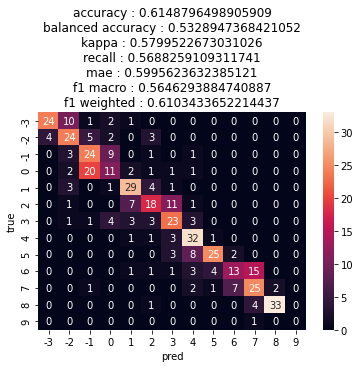

              precision    recall  f1-score   support

          -3       0.86      0.63      0.73        38
          -2       0.55      0.63      0.59        38
          -1       0.46      0.63      0.53        38
           0       0.38      0.29      0.33        38
           1       0.66      0.76      0.71        38
           2       0.55      0.47      0.51        38
           3       0.53      0.61      0.57        38
           4       0.63      0.84      0.72        38
           5       0.81      0.66      0.72        38
           6       0.59      0.34      0.43        38
           7       0.56      0.66      0.60        38
           8       0.94      0.87      0.90        38
           9       0.00      0.00      0.00         1

    accuracy                           0.61       457
   macro avg       0.58      0.57      0.56       457
weighted avg       0.62      0.61      0.61       457

2
           abs_err             err_ratio          
              mean      me

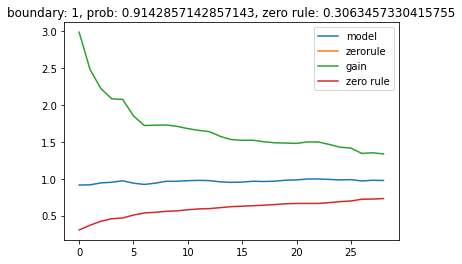

In [14]:
ge.display_results(v4_results)

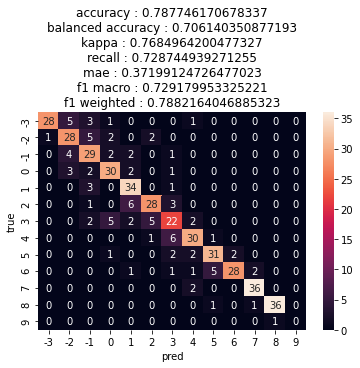

              precision    recall  f1-score   support

          -3       0.97      0.74      0.84        38
          -2       0.70      0.74      0.72        38
          -1       0.64      0.76      0.70        38
           0       0.73      0.79      0.76        38
           1       0.72      0.89      0.80        38
           2       0.78      0.74      0.76        38
           3       0.59      0.58      0.59        38
           4       0.79      0.79      0.79        38
           5       0.82      0.82      0.82        38
           6       0.93      0.74      0.82        38
           7       0.92      0.95      0.94        38
           8       0.97      0.95      0.96        38
           9       0.00      0.00      0.00         1

    accuracy                           0.79       457
   macro avg       0.74      0.73      0.73       457
weighted avg       0.80      0.79      0.79       457

2
           abs_err             err_ratio          
              mean      me

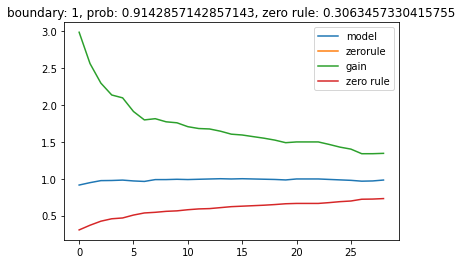

In [15]:
ge.display_results(v7_results)

# Trained on TPCH, Inference on IMDB

In [21]:
imdb = datasets.QueriesDataset('imdb:optimized')
imdb_sample = imdb.sample(n=500, strategy='bucketed')

2021-01-31 12:41:52,213 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/optimized/runtimes/data_part_00.csv [1/1]
2021-01-31 12:41:53,988 | dqo.datasets | INFO | Loaded 27512 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/optimized/runtimes/data_part_00.csv [1/1]


In [22]:
v2_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/tpch/version_0/checkpoints/epoch=48-step=881537.ckpt'), 
    dataset=imdb, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
v3_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v3/logs/tpch/version_0/checkpoints/epoch=68-step=1254626.ckpt'), 
    dataset=imdb, 
    encoder=v3.encoder, 
    model_cls=v3.model.GereltRegressor
)
v4_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v4/logs/tpch/version_0/checkpoints/epoch=48-step=890966.ckpt'), 
    dataset=imdb, 
    encoder=v4.encoder, 
    model_cls=v4.model.GereltRegressor
)
v7_estimater = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v7/logs/tpch/version_2/checkpoints/epoch=108-step=1981946.ckpt'), 
    dataset=imdb, 
    encoder=v7.encoder, 
    model_cls=v7.model.GereltRegressor
)

In [23]:
v2_results = v2_estimater.evaluate(df=imdb_sample)
print(json.dumps(ge.evaluate_metrics(v2_results)))
v3_results = v3_estimater.evaluate(df=imdb_sample)
print(json.dumps(ge.evaluate_metrics(v3_results)))
v4_results = v4_estimater.evaluate(df=imdb_sample)
print(json.dumps(ge.evaluate_metrics(v4_results)))
v7_results = v7_estimater.evaluate(df=imdb_sample)
print(json.dumps(ge.evaluate_metrics(v7_results)))

  0%|          | 0/492 [00:00<?, ?it/s]

{"accuracy": 0.05894308943089431, "balanced accuracy": -0.026607538802660757, "kappa": -0.026607538802660757, "recall": 0.058943089430894303, "mae": 3.6422764227642275, "f1 macro": 0.045383863873635, "f1 weighted": 0.045383863873635}


  0%|          | 0/492 [00:00<?, ?it/s]

{"accuracy": 0.08130081300813008, "balanced accuracy": -0.0022172949002217265, "kappa": -0.0022172949002217113, "recall": 0.08130081300813008, "mae": 3.959349593495935, "f1 macro": 0.05473213047410397, "f1 weighted": 0.054732130474103975}


  0%|          | 0/492 [00:00<?, ?it/s]

{"accuracy": 0.0975609756097561, "balanced accuracy": 0.015521064301552132, "kappa": 0.015521064301552201, "recall": 0.09756097560975611, "mae": 3.5142276422764227, "f1 macro": 0.06948125707905299, "f1 weighted": 0.06948125707905299}


100%|██████████| 492/492 [01:37<00:00,  5.06it/s]

{"accuracy": 0.06707317073170732, "balanced accuracy": -0.017738359201773825, "kappa": -0.017738359201774134, "recall": 0.06707317073170732, "mae": 3.7378048780487805, "f1 macro": 0.04780480004620846, "f1 weighted": 0.047804800046208476}


## NUMBERS VS STRINGS

In [16]:
qe = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_1/checkpoints/epoch=60.ckpt'), 
    dataset=imdb, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
r = qe.evaluate(df=datasets.QueriesDataset('imdb:only_strings').load())
json.dumps(ge.evaluate_metrics(r))

2021-01-25 15:50:05,965 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_strings/runtimes/data_part_00.csv [1/1]
2021-01-25 15:50:05,970 | dqo.datasets | INFO | Loaded 47 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_strings/runtimes/data_part_00.csv [1/1]
100%|██████████| 47/47 [00:02<00:00, 20.69it/s]


'{"accuracy": 0.7659574468085106, "balanced accuracy": 0.785813492063492, "kappa": 0.7227882037533513, "recall": 0.8096119929453263, "mae": 0.23404255319148937, "f1 macro": 0.7920926205239931, "f1 weighted": 0.7689874094755195}'

In [17]:
qe = ge.QueryEstimater(
    os.path.join(os.getcwd(), 'v2/logs/three_opt_default_adam/version_1/checkpoints/epoch=60.ckpt'), 
    dataset=imdb, 
    encoder=v2.encoder, 
    model_cls=v2.model.GereltRegressor
)
r = qe.evaluate(df=datasets.QueriesDataset('imdb:only_numbers').load())
json.dumps(ge.evaluate_metrics(r))

2021-01-25 15:50:22,596 | dqo.datasets | INFO | Reading data from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_numbers/runtimes/data_part_00.csv [1/1]
2021-01-25 15:50:22,601 | dqo.datasets | INFO | Loaded 124 rows from /Users/danieldubovski/projects/deep_query_optimization/dqo/datasets/imdb/execution/only_numbers/runtimes/data_part_00.csv [1/1]
100%|██████████| 124/124 [00:07<00:00, 16.15it/s]
/usr/local/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


'{"accuracy": 0.6854838709677419, "balanced accuracy": 0.5517496392496393, "kappa": 0.6316551146317313, "recall": 0.5413997113997114, "mae": 0.3870967741935484, "f1 macro": 0.5584700352153182, "f1 weighted": 0.6928782798457175}'

## RANDOM QUERIES

In [17]:
v1_results.predict_query('select MIN(id) from aka_title')

0.3487551234163082

In [60]:
v1_results.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id and cast_info.note like "%a%"')

11.159208242646764

In [61]:
v1_results.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id and aka_title.movie_id > 10')

26.097686612759194

In [62]:
v1_results.predict_query('select MIN(id) from aka_title, cast_info where aka_title.movie_id = cast_info.movie_id')

98.77698618825976

In [63]:
v1_results.predict_query('select MIN(id) from cast_info')

2.9044822055115933

# overfitting

In [43]:
import re

epoch_num_regex = re.compile("epoch=(\d.*)-")

In [49]:
epoch_num_regex.search(cps[1])[1]

'20'

In [53]:
cp_path = os.path.join(os.getcwd(), 'v7/logs/tpch/version_2/checkpoints/')
cps = [os.path.join(cp_path, f) for f in os.listdir(cp_path)]
cps = sorted(cps, key= lambda s: int(epoch_num_regex.search(s)[1]))

v = v7
for cp in tqdm(cps):
    qe = ge.QueryEstimater(cp, dataset=imdb, encoder=v.encoder, model_cls=v.model.GereltRegressor)
    r = qe.evaluate(df=imdb_sample)
    print(int(epoch_num_regex.search(cp)[1]), json.dumps(ge.evaluate_metrics(r)))

  0%|          | 0/492 [00:00<?, ?it/s]

0 {"accuracy": 0.06097560975609756, "balanced accuracy": -0.024390243902439015, "kappa": -0.024390243902439046, "recall": 0.06097560975609757, "mae": 3.6422764227642275, "f1 macro": 0.02112067752736277, "f1 weighted": 0.021120677527362762}


  0%|          | 0/492 [00:00<?, ?it/s]

10 {"accuracy": 0.08739837398373984, "balanced accuracy": 0.0044345898004434685, "kappa": 0.0044345898004433115, "recall": 0.08739837398373984, "mae": 3.733739837398374, "f1 macro": 0.04769932710999294, "f1 weighted": 0.04769932710999293}


  0%|          | 0/492 [00:00<?, ?it/s]

20 {"accuracy": 0.09959349593495935, "balanced accuracy": 0.017738359201773843, "kappa": 0.0177383592017738, "recall": 0.09959349593495935, "mae": 3.855691056910569, "f1 macro": 0.07210574265724541, "f1 weighted": 0.07210574265724541}


  0%|          | 0/492 [00:00<?, ?it/s]

30 {"accuracy": 0.06910569105691057, "balanced accuracy": -0.0155210643015521, "kappa": -0.015521064301552201, "recall": 0.06910569105691057, "mae": 3.8922764227642275, "f1 macro": 0.056205571614686665, "f1 weighted": 0.056205571614686665}


  0%|          | 0/492 [00:00<?, ?it/s]

40 {"accuracy": 0.08130081300813008, "balanced accuracy": -0.0022172949002217113, "kappa": -0.0022172949002219333, "recall": 0.0813008130081301, "mae": 3.8963414634146343, "f1 macro": 0.05440317578015907, "f1 weighted": 0.05440317578015906}


  0%|          | 0/492 [00:00<?, ?it/s]

50 {"accuracy": 0.04878048780487805, "balanced accuracy": -0.03769401330376939, "kappa": -0.037694013303769314, "recall": 0.04878048780487806, "mae": 3.908536585365854, "f1 macro": 0.03365239684153922, "f1 weighted": 0.033652396841539214}


  0%|          | 0/492 [00:00<?, ?it/s]

60 {"accuracy": 0.07317073170731707, "balanced accuracy": -0.011086474501108633, "kappa": -0.011086474501108556, "recall": 0.07317073170731708, "mae": 3.7134146341463414, "f1 macro": 0.05306781211170167, "f1 weighted": 0.05306781211170167}


  0%|          | 0/492 [00:00<?, ?it/s]

70 {"accuracy": 0.06504065040650407, "balanced accuracy": -0.019955654101995554, "kappa": -0.019955654101995846, "recall": 0.06504065040650407, "mae": 3.741869918699187, "f1 macro": 0.04551140029438382, "f1 weighted": 0.04551140029438382}


  0%|          | 0/492 [00:00<?, ?it/s]

80 {"accuracy": 0.052845528455284556, "balanced accuracy": -0.033259423503325926, "kappa": -0.03325942350332589, "recall": 0.05284552845528456, "mae": 4.123983739837398, "f1 macro": 0.0347589530158957, "f1 weighted": 0.034758953015895704}


  0%|          | 0/492 [00:00<?, ?it/s]

90 {"accuracy": 0.07113821138211382, "balanced accuracy": -0.01330376940133036, "kappa": -0.013303769401330268, "recall": 0.07113821138211383, "mae": 3.7357723577235773, "f1 macro": 0.055375077480058564, "f1 weighted": 0.055375077480058564}


  0%|          | 0/492 [00:00<?, ?it/s]

100 {"accuracy": 0.09552845528455285, "balanced accuracy": 0.013303769401330389, "kappa": 0.013303769401330268, "recall": 0.09552845528455285, "mae": 3.6321138211382116, "f1 macro": 0.062056506947238584, "f1 weighted": 0.0620565069472386}


  0%|          | 0/492 [00:00<?, ?it/s]

101 {"accuracy": 0.09146341463414634, "balanced accuracy": 0.008869179600886937, "kappa": 0.008869179600886956, "recall": 0.09146341463414635, "mae": 3.5528455284552845, "f1 macro": 0.0637629113112753, "f1 weighted": 0.06376291131127529}


  0%|          | 0/492 [00:00<?, ?it/s]

102 {"accuracy": 0.07317073170731707, "balanced accuracy": -0.011086474501108648, "kappa": -0.011086474501108556, "recall": 0.07317073170731707, "mae": 3.821138211382114, "f1 macro": 0.048619503696094434, "f1 weighted": 0.048619503696094434}


  0%|          | 0/492 [00:00<?, ?it/s]

103 {"accuracy": 0.07113821138211382, "balanced accuracy": -0.013303769401330373, "kappa": -0.01330376940133049, "recall": 0.07113821138211382, "mae": 3.6910569105691056, "f1 macro": 0.04493720640162449, "f1 weighted": 0.04493720640162449}


  0%|          | 0/492 [00:00<?, ?it/s]

104 {"accuracy": 0.08739837398373984, "balanced accuracy": 0.0044345898004434685, "kappa": 0.004434589800443534, "recall": 0.08739837398373984, "mae": 3.7357723577235773, "f1 macro": 0.055131432743714126, "f1 weighted": 0.055131432743714126}


  0%|          | 0/492 [00:00<?, ?it/s]

105 {"accuracy": 0.06300813008130081, "balanced accuracy": -0.022172949002217297, "kappa": -0.022172949002217335, "recall": 0.06300813008130081, "mae": 3.6321138211382116, "f1 macro": 0.040975973255072594, "f1 weighted": 0.040975973255072594}


  0%|          | 0/492 [00:00<?, ?it/s]

106 {"accuracy": 0.07926829268292683, "balanced accuracy": -0.004434589800443453, "kappa": -0.0044345898004434225, "recall": 0.07926829268292683, "mae": 3.709349593495935, "f1 macro": 0.052094276479794976, "f1 weighted": 0.052094276479794976}


  0%|          | 0/492 [00:00<?, ?it/s]

107 {"accuracy": 0.06097560975609756, "balanced accuracy": -0.024390243902439022, "kappa": -0.024390243902439046, "recall": 0.06097560975609756, "mae": 3.83739837398374, "f1 macro": 0.03831690631122563, "f1 weighted": 0.038316906311225626}


100%|██████████| 492/492 [01:54<00:00,  4.31it/s]


108 {"accuracy": 0.06707317073170732, "balanced accuracy": -0.017738359201773825, "kappa": -0.017738359201774134, "recall": 0.06707317073170732, "mae": 3.7378048780487805, "f1 macro": 0.04780480004620846, "f1 weighted": 0.047804800046208476}



In [ ]:
cp_path = os.path.join(os.getcwd(), 'v4/logs/tpch/version_0/checkpoints/')
cps = [os.path.join(cp_path, f) for f in os.listdir(cp_path)]
cps = sorted(cps, key= lambda s: int(epoch_num_regex.search(s)[1]))
v = v4
for cp in tqdm(cps):
    qe = ge.QueryEstimater(cp, dataset=imdb, encoder=v.encoder, model_cls=v.model.GereltRegressor)
    r = qe.evaluate(df=imdb_sample)
    print(int(epoch_num_regex.search(cp)[1]), json.dumps(ge.evaluate_metrics(r)))